<a href="https://colab.research.google.com/github/Yassmine-Yazidi-573/codeAlpha-tasks03/blob/main/task03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df= pd.read_csv('A_Z Handwritten Data.csv')

In [2]:
#seperate feature and lables (means class names)
x= df.drop ('0' , axis=1).values
y=df['0'].values
#normalize and reshape data
x=x/255.0
x= x.reshape (-1, 28,28,1)
x_train, x_test, y_train, y_test= train_test_split(x,y ,test_size=0.2 , random_state=42 )

# **Build + Train the Model ( CNN)**

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')  # 26 for A-Z
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.8950 - loss: nan - val_accuracy: 0.6280 - val_loss: nan
Epoch 2/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.6259 - loss: nan - val_accuracy: 0.6280 - val_loss: nan
Epoch 3/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6310 - loss: nan - val_accuracy: 0.6280 - val_loss: nan
Epoch 4/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.6293 - loss: nan - val_accuracy: 0.6280 - val_loss: nan
Epoch 5/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6222 - loss: nan - val_accuracy: 0.6280 - val_loss: nan
Epoch 6/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.6310 - loss: nan - val_accuracy: 0.6280 - val_loss: nan
Epoch 7/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 0.6259 - loss: nan - val_accuracy: 0.6280 - val_loss: nan
Epoch 8/10
554/554 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.6202 - loss: nan - val_accuracy: 0.6280 - val_loss: nan
Epoch 9/

# **Evaluation and prediction **

139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6380 - loss: nan
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Text(0.5, 1.0, 'Predicted: A')

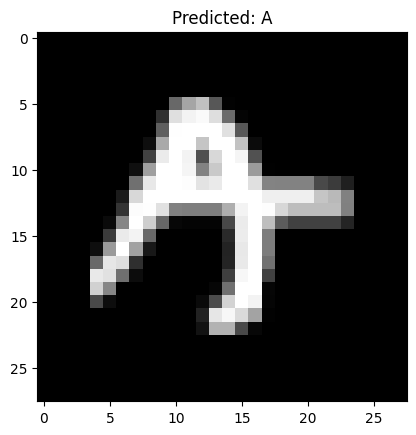

In [4]:
model.evaluate(x_test, y_test)

# Predict a sample
import matplotlib.pyplot as plt
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {chr(model.predict(x_test[0:1]).argmax() + 65)}")

In [5]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.2f}")

139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6380 - loss: nan
Test Accuracy: 62.80%
Test Loss: nan


# **Prediction for a Letter Written BY Me!**

In [22]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
img = cv2.imread('My_letter.jpeg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = 255 - img
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
img = img / 255.0
img = img.reshape(1, 28, 28, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


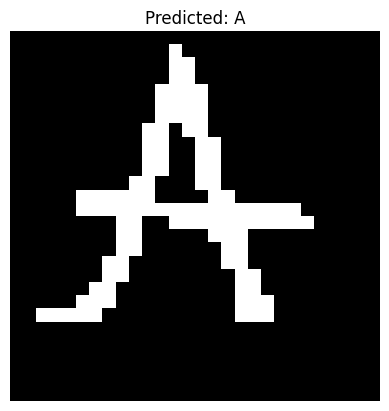

In [23]:
plt.imshow(img.reshape(28, 28), cmap='gray')
predicted_class= model.predict(img).argmax()
plt.title(f"Predicted: {chr(predicted_class + 65)}")
plt.axis('off')
plt.show()